# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Dataset**

In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Checking for Null Values**

In [4]:
total_cells = df.size
total_missing = df.isnull().sum().sum()
percent_missing = round((total_missing / total_cells) * 100, 2)
print(percent_missing)

4.08


**Luckily only 4 percent of data has null values. Checking the null value distribution below**

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Checking the null values in the form of DataFrames to make sure.**

In [6]:
df[df.director.isnull()].head(5)
#df[df.cast.isnull()]
#df[df.country.isnull()]
#df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


# **Replacing Null Values**

In [7]:
df = df.fillna('Unknown')

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.sample(n=5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1907,s1908,TV Show,Familiar Wife,Unknown,"Ji Sung, Han Ji-min, Kang Han-na, Jang Seung-jo",South Korea,"October 1, 2020",2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",After receiving a bizarre chance to go back in...
5470,s5471,TV Show,Bloodline,Unknown,"Kyle Chandler, Ben Mendelsohn, Sissy Spacek, L...",United States,"May 26, 2017",2017,TV-MA,3 Seasons,"TV Dramas, TV Mysteries, TV Thrillers",When the black sheep son of a respected family...
7230,s7231,Movie,Krish Trish and Baltiboy: Face Your Fears,Tilak Shetty,"Tarun Ratnani, Smita Malhotra, Deepak Chachra",India,"November 17, 2017",2017,TV-Y7,65 min,Children & Family Movies,"In three tales about fear, a baby elephant get..."
5021,s5022,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
5019,s5020,Movie,Trailer Park Boys: Xmas Special,Mike Clattenburg,"John Paul Tremblay, Robb Wells, John Dunsworth...",Canada,"March 1, 2018",2004,TV-MA,46 min,Movies,See what Sunnyvale Trailer Park was like back ...


# **What are the most common types of content on Netflix (Movies vs TV Shows)?**

In [10]:
df['type'].value_counts()
#df.groupby('type').size()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

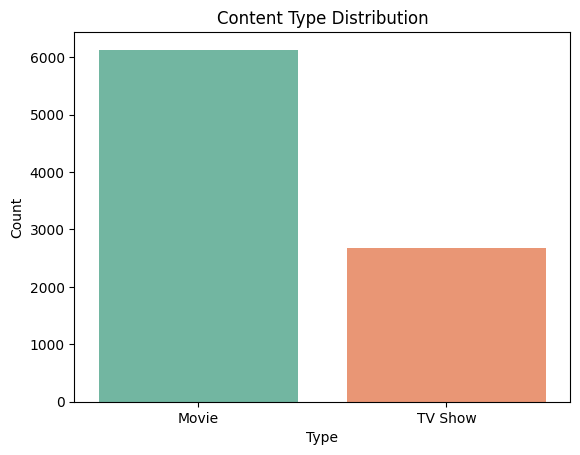

In [11]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# **How has the number of Netflix releases changed over the years (2012 - 2021)?**

In [12]:
year_counts = df['release_year'].value_counts()
top10_years = year_counts.head(10).sort_index()
print(top10_years)

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


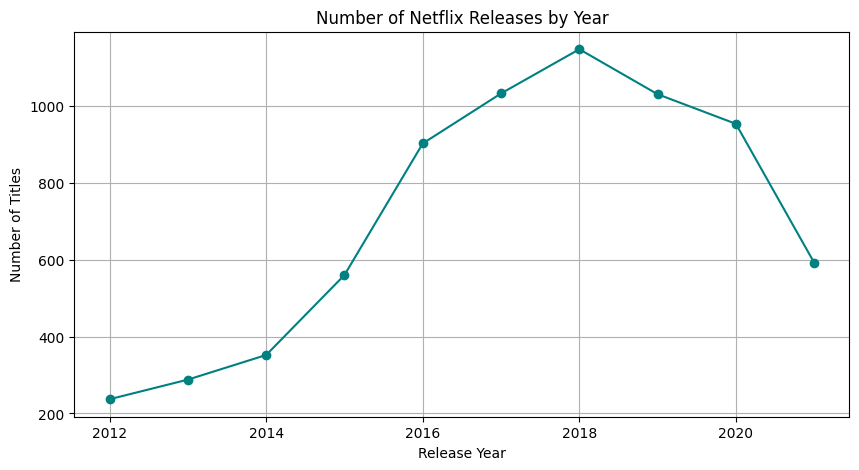

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(top10_years.index, top10_years.values, marker='o', linestyle='-', color='teal')
plt.title("Number of Netflix Releases by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# **Which countries produce the most Netflix content?**

In [14]:
top_countries = df['country'].value_counts().head(10).sort_values(ascending=False)
print(top_countries)

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


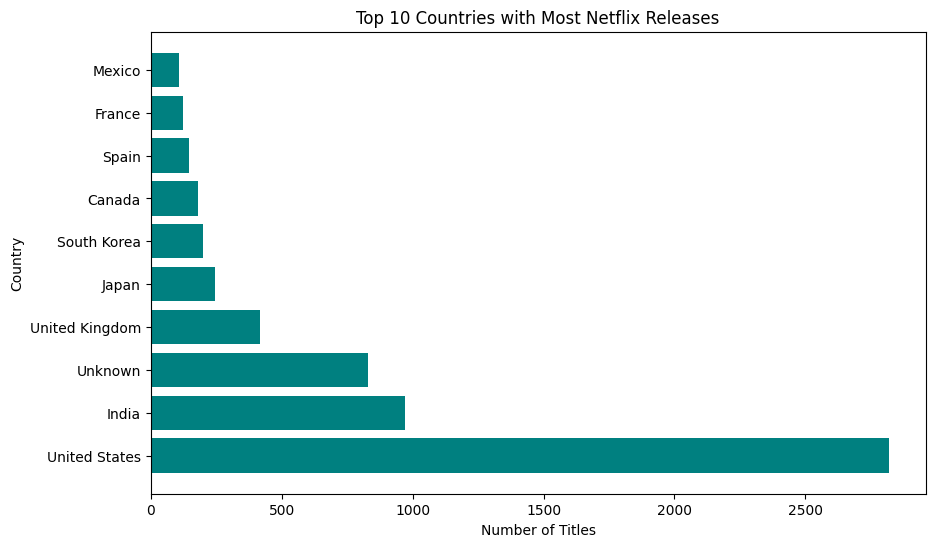

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values, color='teal')
plt.title("Top 10 Countries with Most Netflix Releases")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# **What are the distribution of ratings?**

In [16]:
dist=df['rating'].value_counts()

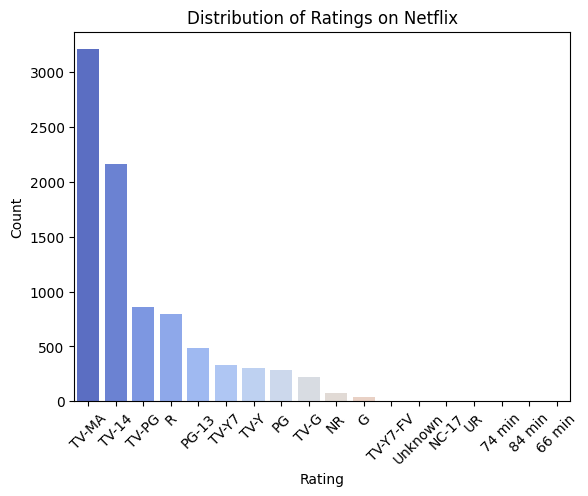

In [17]:
sns.countplot(data=df, x='rating', palette='coolwarm', order = dist.index)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()